In [1]:
library(tidyverse)

# Football field input data (₹/t-steel)
df <- tribble(
  ~segment, ~low, ~mid, ~high, ~category,
  "Construction (India)", 800, 1000, 1200, "India",
  "Automotive (India)", 1100, 1400, 1700, "India",
  "China (Reference)", 1700, 2300, 2900, "Global",
  "Korea (2030)", 5000, 6500, 8300, "Global",
  "EU (Today)", 11200, 14000, 16600, "Global"
)

# Order for plotting (top to bottom)
df$segment <- factor(
  df$segment,
  levels = rev(df$segment)
)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


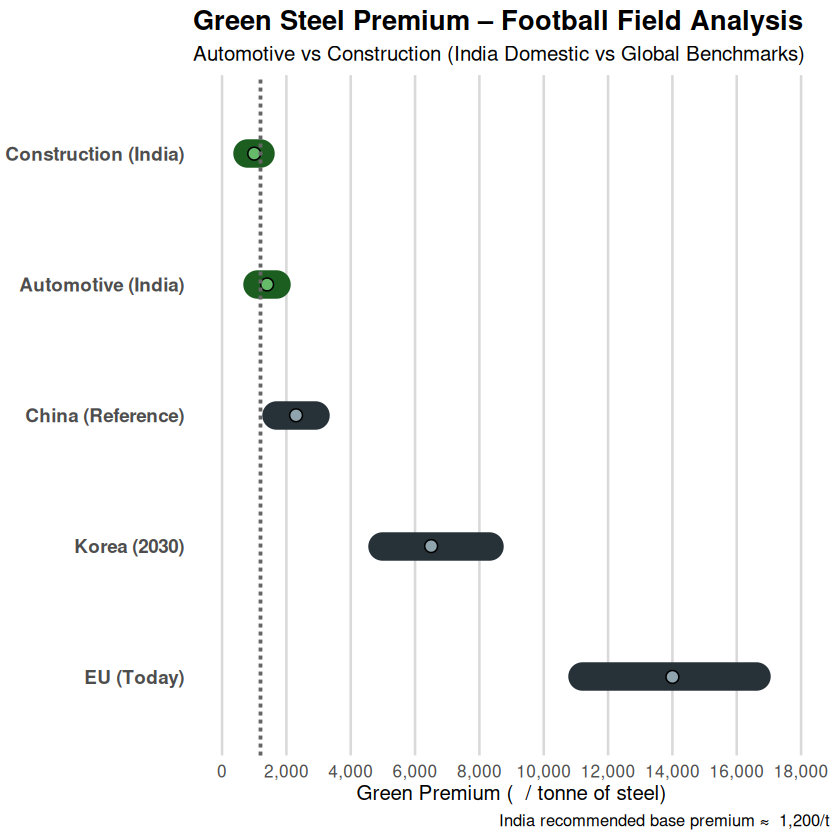

In [2]:
ggplot(df) +

  # Range (football field bar)
  geom_segment(
    aes(
      y = segment,
      yend = segment,
      x = low,
      xend = high,
      color = category
    ),
    linewidth = 6,
    lineend = "round"
  ) +

  # Median point
  geom_point(
    aes(
      y = segment,
      x = mid,
      fill = category
    ),
    shape = 21,
    size = 3,
    color = "black"
  ) +

  # Vertical reference line (India recommended base)
  geom_vline(
    xintercept = 1200,
    linetype = "dashed",
    color = "grey40",
    linewidth = 0.8
  ) +

  # Colors – muted consulting palette
  scale_color_manual(
    values = c(
      "India" = "#1B5E20",     # deep green
      "Global" = "#263238"    # charcoal
    )
  ) +
  scale_fill_manual(
    values = c(
      "India" = "#66BB6A",
      "Global" = "#90A4AE"
    )
  ) +

  # Axis formatting
  scale_x_continuous(
    limits = c(0, 18000),
    breaks = seq(0, 18000, 2000),
    labels = scales::comma
  ) +

  labs(
    title = "Green Steel Premium – Football Field Analysis",
    subtitle = "Automotive vs Construction (India Domestic vs Global Benchmarks)",
    x = "Green Premium (₹ / tonne of steel)",
    y = NULL,
    caption = "India recommended base premium ≈ ₹1,200/t"
  ) +

  # Theme: McKinsey / Goldman look
  theme_minimal(base_size = 12) +
  theme(
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_line(color = "grey85"),
    axis.text.y = element_text(size = 11, face = "bold"),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12),
    legend.position = "none"
  )


In [3]:
ggsave(
  "green_steel_football_field.png",
  width = 12,
  height = 6,
  dpi = 300
)
